In [1]:
import numpy as np
import matplotlib.pyplot as plt
import integration_functions as int_fun

## Calculate Source term

### in (1+1) dimensions

In [ ]:
T = 0.01
Lambda = 1e5
spatial_dimension = 1

mu_arr = [0.0, 0.5, 1.0]
k_arr = [1e5, 1.25, 0.99, 0.75, 0.49, 0.25, 0.00]
sigmaMax = 1e10

fig, axes = plt.subplots(1, 3, constrained_layout=True ,figsize=(10,5))

for mu, ax in zip(mu_arr, axes):
    args = int_fun.generate_args(spatial_dimension, Lambda, mu, T, 2)
    for k in k_arr:
        grid = np.geomspace(0.01, sigmaMax, 1000)
        S = int_fun.S(k, grid, *args)

        ax.plot(grid, S, label=f'k={k:.2f}')

    ax.legend()
    ax.grid()
    ax.set_yscale("symlog")
    ax.set_xscale("log")
    ax.set_ylabel(r'$S(k, \sigma)$')
    ax.set_xlabel(r'$\sigma$')
    ax.set_title(r'$\mu={muval}$, $T={tval}$'.format(muval=mu, tval=T))

fig.suptitle("spatial dimension = 1")
plt.show()

### in (2+1) dimensions

In [ ]:
T = 0.01
Lambda = 1e5
spatial_dimension = 2

mu_arr = [0.0, 0.5, 1.0]
k_arr = [1e5, 1.25, 0.99, 0.75, 0.49, 0.25, 0.00]
sigmaMax = 1e12

fig, axes = plt.subplots(1, 3, constrained_layout=True ,figsize=(10,5))

for mu, ax in zip(mu_arr, axes):
    args = int_fun.generate_args(spatial_dimension, Lambda, mu, T, 2)
    for k in k_arr:
        grid = np.geomspace(0.00001, sigmaMax, 1000)
        S = int_fun.S(k, grid, *args)

        ax.plot(grid, S, label=f'k={k:.2f}')

    ax.legend()
    ax.grid()
    ax.set_yscale("symlog")
    ax.set_xscale("log")
    ax.set_ylabel(r'$S(k, \sigma)$')
    ax.set_xlabel(r'$\sigma$')
    ax.set_title(r'$\mu={muval}$, $T={tval}$'.format(muval=mu, tval=T))

fig.suptitle("spatial dimension = 2")
plt.show()

# Calculate flow with parameters of arXiv:1212.4624v1

They use two parameter sets which can be converted with

\begin{align}
\sigma_0 = m_f/h_{\Lambda}
\end{align}

1. $h_{\Lambda} = 18.0, m_f = 1.0 \rightarrow h = 6.0, \sigma_0 = 0.05\bar{5}$
2. $h_{\Lambda} = 6.0, m_f = 5.0 \rightarrow h = 6.0, \sigma_0 = 1.2$

In addition, the use $\Lambda = 100$. I don't know what IR cutoff they use, but I just go to $k_{ir} = 10^{-4}$ and I think this is enought. 

In [2]:
import Grid
import importlib
import Flow
importlib.reload(Flow)

import integration_functions as int_fun
importlib.reload(int_fun)

import dataClass #import the module here, so that it can be reloaded.
importlib.reload(dataClass)

path = './GN-test'

## Set 1.

For $N_f=2$, $T_{crit}/m_f = 0.49$. Therefore $T_{crit} = 0.49$ for Set 1.

Grid from 0 to 12.00, with 2000 grid points. Using extrapolation on right boundary of order 1.
In the intervall [0, 1] the smalles (largest) spacing between gridpoints is 0.006 (0.006)
    Integration done from 0 (1.0e+02) to 13.816 (1.0e-04); time elapsed = 1.01 seconds


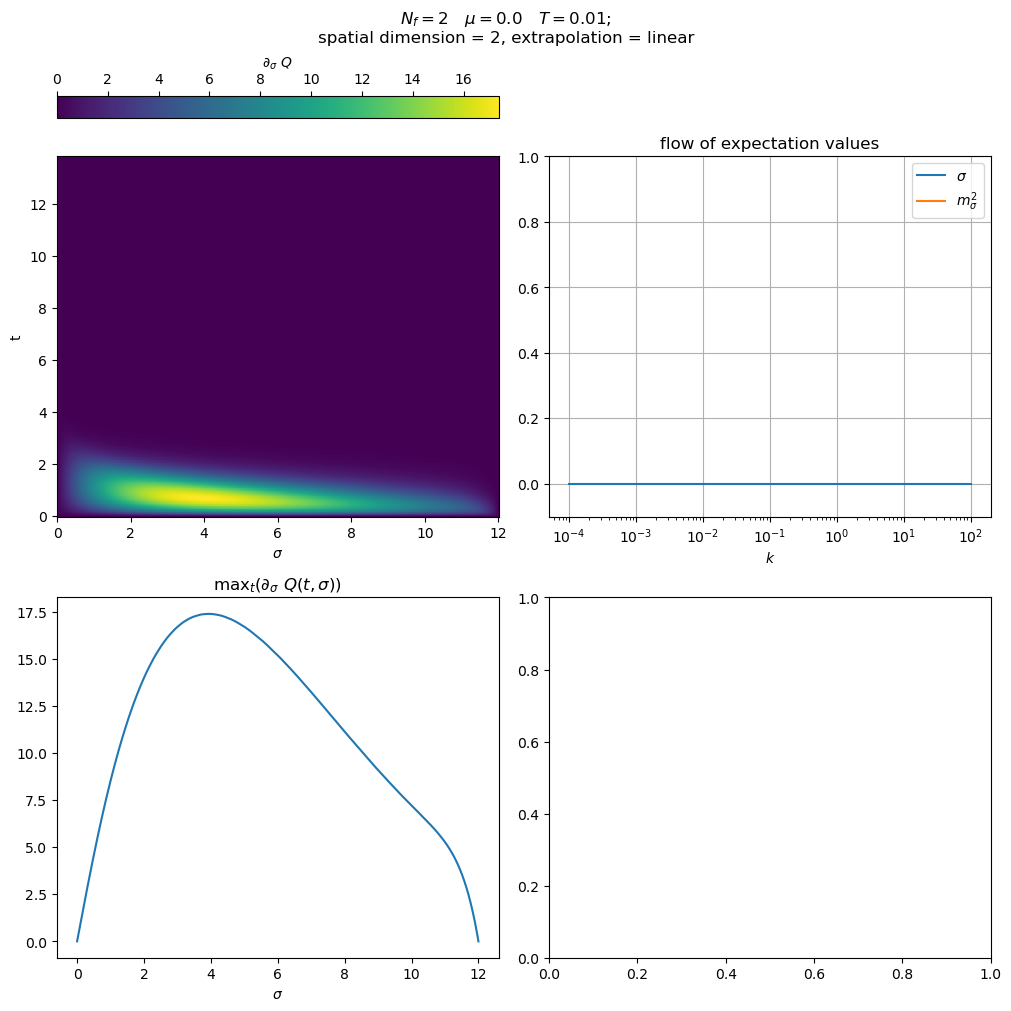

In [8]:
spatial_dimension = 2
Lambda = 100
kir = 1e-4
n_flavor = 2
# n_flavor = np.Inf
mu = 0.0
T = 0.01
tolerance = 5e-14

# configure spatial domain
n_grid = 2000
sigma_max = 12
extrapolation_oder = 1
grid = Grid.UniformGrid(sigma_max, n_grid, extrapolation_oder)

args = int_fun.generate_args(spatial_dimension, Lambda, mu, T, n_flavor, 6.0, 0.056)

filename = int_fun.generate_filename(
    mu, T, sigma_max, n_grid, kir, tolerance, *args)

storage_dict = int_fun.storage_dictionary(*args)

flow = Flow.Flow(Lambda, kir, grid, mu, T, filename=filename, initial_condition=int_fun.initial_condition, Q=int_fun.Q, S=int_fun.S,
            args=args, save_flow_flag=True, console_logging=True, number_of_observables=500, tolerance=tolerance, file_attributes=storage_dict)

print(flow)

flow.compute()
flow.get_observables_for_all_positions()
location = flow.save(path)

with dataClass.FlowData(location) as f:
    fig, ((diffPlot, flowObservables), (maxDiff, _)) = plt.subplots(2,2, constrained_layout=True ,figsize=(10,10))
    f.enter_plot_title(fig)
    f.plot_Q(diffPlot)
    f.plot_sigma_and_msquare_flow(flowObservables)
    f.plot_max_Q_of_x(maxDiff)
    plt.show()
# fig, (gridPlot, flowObservables) = plt.subplots(1,2, constrained_layout=True ,figsize=(10,5))


# plt.plot(flow.observable_array["t"], flow.observable_array["sigma"])
# plt.grid()
# plt.show()

# plt.plot(flow.observable_array["t"], flow.observable_array["massSquare"])
# plt.yscale("log")

For $N_f=20$, $T_{crit}/m_f = 0.65$. Therefore $T_{crit} = 0.65$ for Set 1.

Grid from 0 to 6.00, with 1000 grid points. Using extrapolation on right boundary of order 1.
In the intervall [0, 1] the smalles (largest) spacing between gridpoints is 0.006 (0.006)


/home/jamaly/miniconda3/envs/flow-master/lib/python3.10/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


    Integration done from 0 (1.0e+02) to 13.816 (1.0e-04); time elapsed = 0.58 seconds


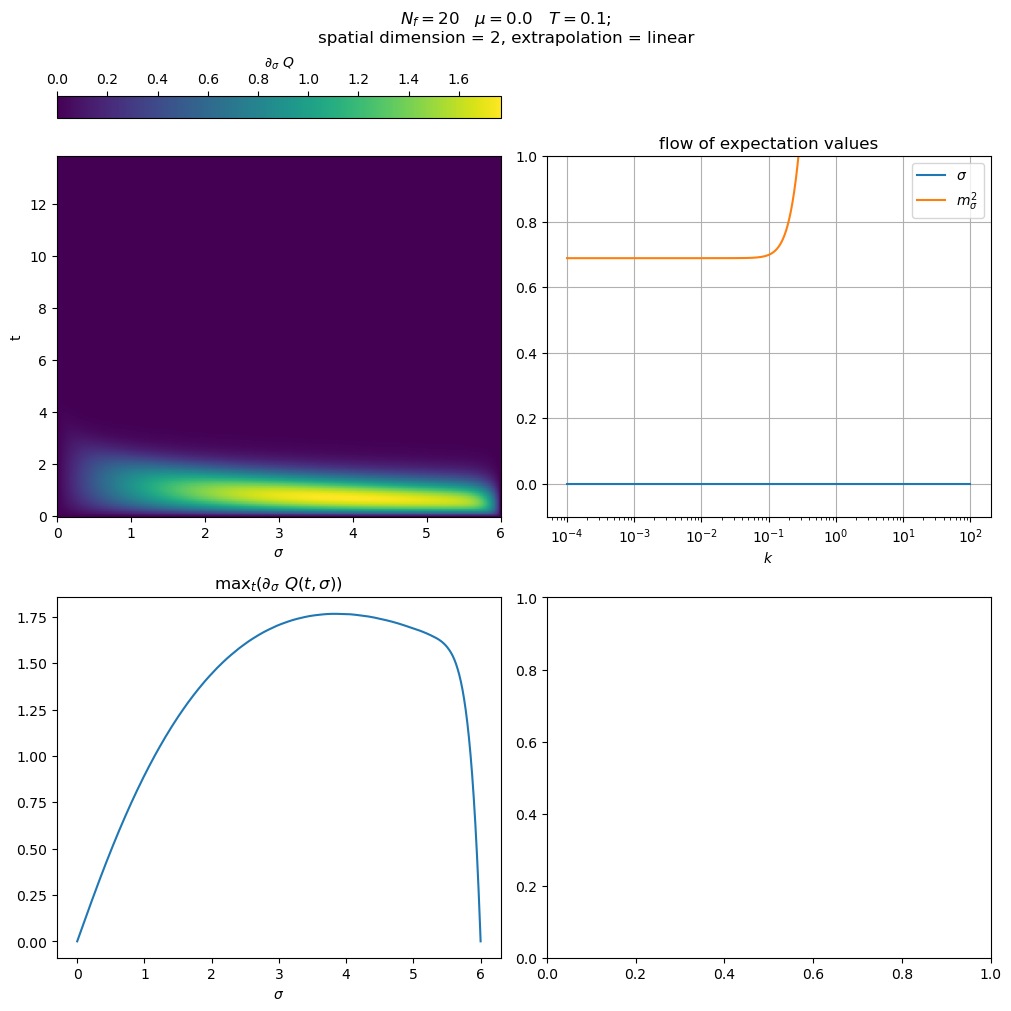

In [9]:
spatial_dimension = 2
Lambda = 100
kir = 1e-4
n_flavor = 20
# n_flavor = np.Inf
mu = 0.0
T = 0.1
path = './'
tolerance = 1e-14

# configure spatial domain
n_grid = 1000
sigma_max = 6
extrapolation_oder = 1
grid = Grid.UniformGrid(sigma_max, n_grid, extrapolation_oder)

args = int_fun.generate_args(spatial_dimension, Lambda, mu, T, n_flavor, 6.0, 0.056)

filename = int_fun.generate_filename(
    mu, T, sigma_max, n_grid, kir, tolerance, *args)

storage_dict = int_fun.storage_dictionary(*args)

flow = Flow.Flow(Lambda, kir, grid, mu, T, filename=filename, initial_condition=int_fun.initial_condition, Q=int_fun.Q, S=int_fun.S,
            args=args, save_flow_flag=True, console_logging=True, number_of_observables=500, tolerance=tolerance, file_attributes=storage_dict)

print(flow)

flow.compute()
flow.get_observables_for_all_positions()
location = flow.save(path)

with dataClass.FlowData(location) as f:
    fig, ((diffPlot, flowObservables), (maxDiff, _)) = plt.subplots(2,2, constrained_layout=True ,figsize=(10,10))
    f.enter_plot_title(fig)
    f.plot_Q(diffPlot)
    f.plot_sigma_and_msquare_flow(flowObservables)
    f.plot_max_Q_of_x(maxDiff)
    plt.show()
# plt.plot(flow.observable_array["t"], flow.observable_array["massSquare"])
# plt.yscale("log")

## Set 2

For $N_f=2$, $T_{crit}/m_f = 0.45$. Therefore $T_{crit} = 2.25$ for Set 2.

Grid from 0 to 12.00, with 2000 grid points. Using extrapolation on right boundary of order 1.
In the intervall [0, 1] the smalles (largest) spacing between gridpoints is 0.006 (0.006)


/home/jamaly/miniconda3/envs/flow-master/lib/python3.10/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


    Integration done from 0 (1.0e+02) to 18.421 (1.0e-06); time elapsed = 2.55 seconds


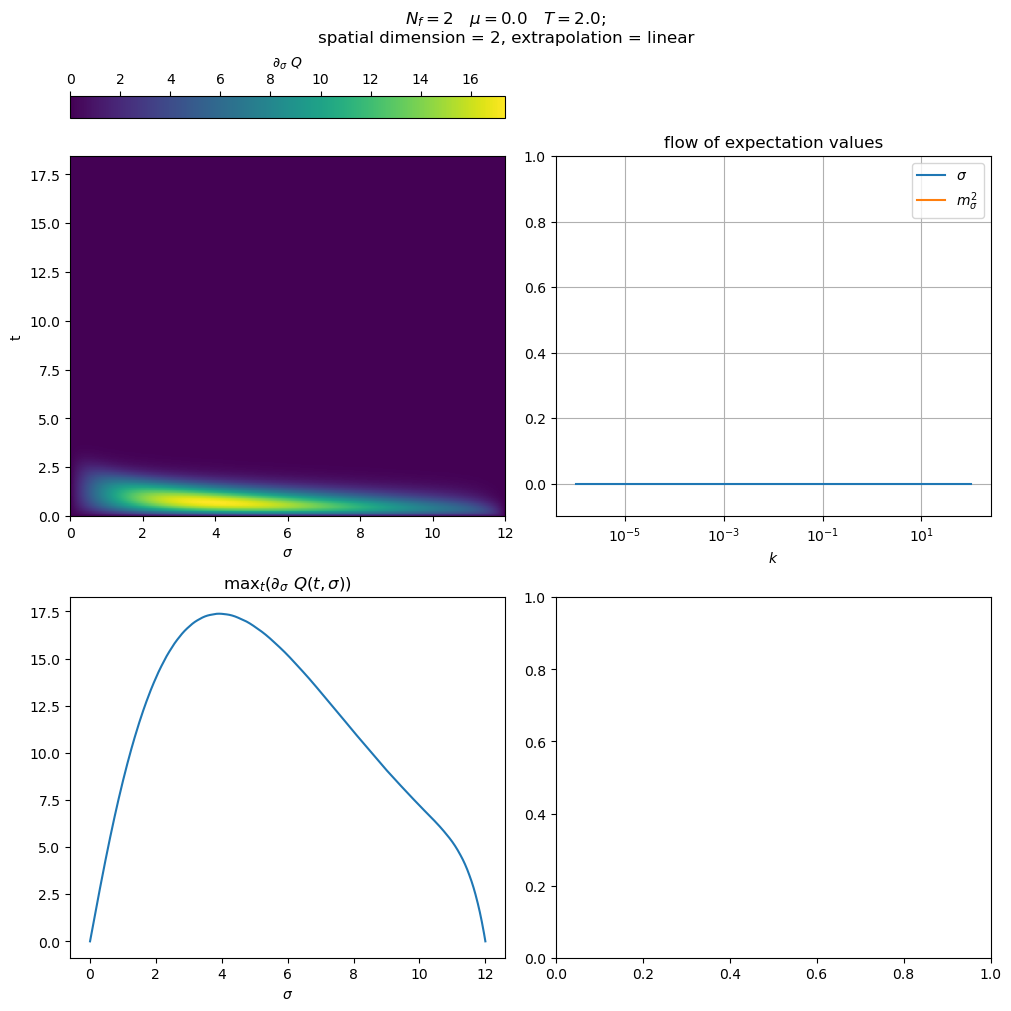

In [10]:
spatial_dimension = 2
Lambda = 100
kir = 1e-6
n_flavor = 2
# n_flavor = np.Inf
mu = 0.0
T = 2.0
path = './'
tolerance = 1e-14

# configure spatial domain
n_grid = 2000
sigma_max = 12
extrapolation_oder = 1
grid = Grid.UniformGrid(sigma_max, n_grid, extrapolation_oder)

args = int_fun.generate_args(spatial_dimension, Lambda, mu, T, n_flavor, 6.0, 0.056)

filename = int_fun.generate_filename(
    mu, T, sigma_max, n_grid, kir, tolerance, *args)

storage_dict = int_fun.storage_dictionary(*args)

flow = Flow.Flow(Lambda, kir, grid, mu, T, filename=filename, initial_condition=int_fun.initial_condition, Q=int_fun.Q, S=int_fun.S,
            args=args, save_flow_flag=True, console_logging=True, number_of_observables=500, tolerance=tolerance, file_attributes=storage_dict)

print(flow)

flow.compute()
flow.get_observables_for_all_positions()
location = flow.save(path)

with dataClass.FlowData(location) as f:
    fig, ((diffPlot, flowObservables), (maxDiff, _)) = plt.subplots(2,2, constrained_layout=True ,figsize=(10,10))
    f.enter_plot_title(fig)
    f.plot_Q(diffPlot)
    f.plot_sigma_and_msquare_flow(flowObservables)
    f.plot_max_Q_of_x(maxDiff)
    plt.show()
# plt.plot(flow.observable_array["t"], flow.observable_array["massSquare"])
# plt.yscale("log")

For $N_f=2$, $T_{crit}/m_f = 0.65$. Therefore $T_{crit} = 3.25$ for Set 2.

Grid from 0 to 12.00, with 2000 grid points. Using extrapolation on right boundary of order 1.
In the intervall [0, 1] the smalles (largest) spacing between gridpoints is 0.006 (0.006)


/home/jamaly/miniconda3/envs/flow-master/lib/python3.10/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


    Integration done from 0 (1.0e+02) to 13.816 (1.0e-04); time elapsed = 0.73 seconds


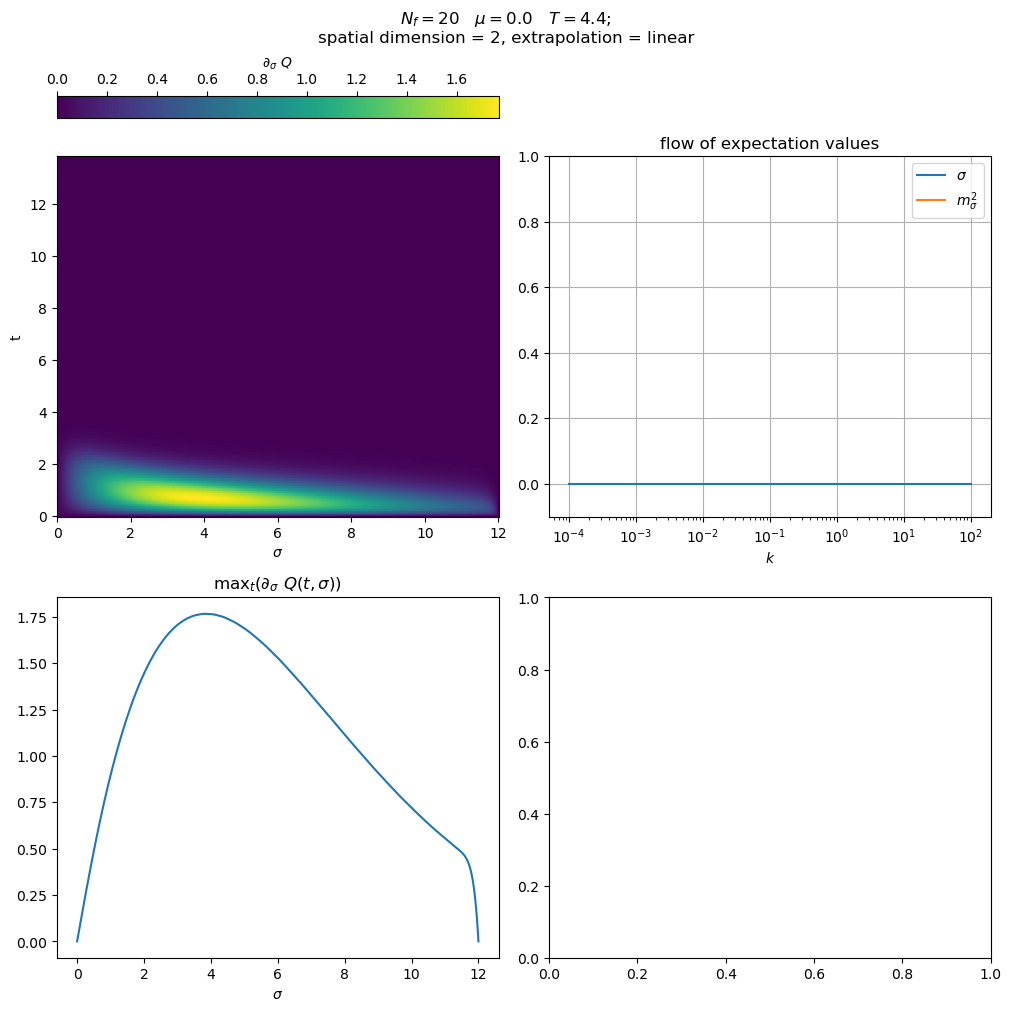

In [11]:
spatial_dimension = 2
Lambda = 100
kir = 1e-4
n_flavor = 20
# n_flavor = np.Inf
mu = 0.0
T = 4.4
path = './'
tolerance = 1e-14

# configure spatial domain
n_grid = 2000
sigma_max = 12
extrapolation_oder = 1
grid = Grid.UniformGrid(sigma_max, n_grid, extrapolation_oder)

args = int_fun.generate_args(spatial_dimension, Lambda, mu, T, n_flavor, 6.0, 0.056)

filename = int_fun.generate_filename(
    mu, T, sigma_max, n_grid, kir, tolerance, *args)

storage_dict = int_fun.storage_dictionary(*args)

flow = Flow.Flow(Lambda, kir, grid, mu, T, filename=filename, initial_condition=int_fun.initial_condition, Q=int_fun.Q, S=int_fun.S,
            args=args, save_flow_flag=True, console_logging=True, number_of_observables=500, tolerance=tolerance, file_attributes=storage_dict)

print(flow)

flow.compute()
flow.get_observables_for_all_positions()
location = flow.save(path)

with dataClass.FlowData(location) as f:
    fig, ((diffPlot, flowObservables), (maxDiff, _)) = plt.subplots(2,2, constrained_layout=True ,figsize=(10,10))
    f.enter_plot_title(fig)
    f.plot_Q(diffPlot)
    f.plot_sigma_and_msquare_flow(flowObservables)
    f.plot_max_Q_of_x(maxDiff)
    plt.show()